# CNN-based Animal Classification Project Overview

## Project Objective:
The main goal of this project is to strengthen my understanding of Convolutional Neural Network (CNN) models. I have built a CNN model to classify animal species, such as distinguishing between classes like "panda" and "dog". This project helped me understand the steps required to train CNN models to perform such tasks efficiently.

## Key Focus Areas:
- **Model Complexity**: I explored whether a deeper model or a model with fewer parameters is more effective for classification.
- **Practical Application**: The project consisted of four main stages:
  1. **Building a CNN Model**: I created, trained, and evaluated a CNN model.
  2. **Image Manipulation and Testing**: I manipulated test images under different lighting conditions and tested the model's robustness.
  3. **Image Color Stability**: If test scores decreased, I explored how color stability algorithms could improve performance. I applied a color correction algorithm to "damaged" images and tested the model again.
  4. **Comparison and Reporting**: Finally, I compared the test results from the three scenarios and provided recommendations for improvements.

## Expected Outcome:
The goal was to compare the performance of the model under different conditions and provide solutions for improving accuracy.


In [ ]:
# Importing libraries for data processing and manipulation
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import os  # for interacting with the operating system, e.g., file handling
import cv2  # for image processing
from sklearn.model_selection import train_test_split  # for splitting the data into training and testing sets

# Importing TensorFlow and Keras libraries for model building
import tensorflow as tf  # main TensorFlow library
from tensorflow.keras.models import Sequential  # for building models layer by layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D  # various layers used in CNNs
from tensorflow.keras.optimizers import Adam  # for optimizer
from tensorflow.keras.utils import to_categorical  # for converting labels to one-hot encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # for data augmentation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
# Importing libraries for visualization
import matplotlib.pyplot as plt  # for plotting graphs and images

## Importing Necessary Libraries

In this section, I imported the required libraries for data processing, model development, evaluation, and visualization:

1. **Data Processing and Manipulation**: 
   - `numpy`: Used for numerical operations and handling multi-dimensional arrays.
   - `pandas`: For data manipulation and analysis.
   - `os`: For file handling and interacting with the operating system.
   - `cv2`: Used for image processing tasks such as resizing and normalization.
   - `train_test_split`: From `sklearn`, used to split the data into training and testing sets.

2. **Model Building**:
   - `tensorflow`: The core library for building and training deep learning models.
   - Keras components like `Sequential`, `Conv2D`, `MaxPooling2D`, `Dense`, and others: Used for creating CNN models and their layers.
   - `Adam`: An optimizer used to train the neural network.
   - `to_categorical`: To convert labels into one-hot encoding.
   - `ImageDataGenerator`: For real-time image data augmentation during training.

3. **Model Evaluation**:
   - `confusion_matrix`, `classification_report`, and `ConfusionMatrixDisplay`: For evaluating model performance and visualizing confusion matrices.

4. **Visualization**:
   - `matplotlib.pyplot`: Used to plot graphs, visualize results, and display images.

X shape: (6500, 224, 224, 3)
y shape: (6500,)


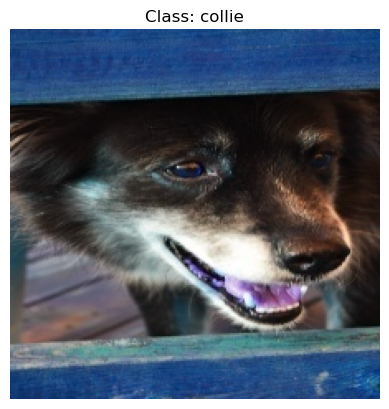

In [7]:
import os
import cv2
import numpy as np

# Path to the original dataset
dataset_path = r"C:\Users\Win\Desktop\Animals_with_Attributes2\JPEGImages"

# Selected classes
classes = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 'rabbit', 'sheep', 'squirrel', 'giant+panda', 'polar+bear']

# Data lists
X = []  # Images
y = []  # Labels

# Loading and processing the dataset
for class_index, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    
    # Get all images in the class folder
    images = os.listdir(class_folder)
    
    # Keep only the first 650 images
    images_to_keep = images[:650]
    
    # Delete the extra images
    for image_name in images[650:]:
        image_path = os.path.join(class_folder, image_name)
        os.remove(image_path)  # Delete extra images
    
    for image_name in images_to_keep:
        image_path = os.path.join(class_folder, image_name)
        
        # Read and resize the image
        img = cv2.imread(image_path)
        img_resized = cv2.resize(img, (224, 224))  # Resize to (224x224)
        img_normalized = img_resized / 255.0  # Normalize
        
        # Save the image back (overwriting the original file)
        cv2.imwrite(image_path, (img_normalized * 255).astype(np.uint8))  # Save normalized image

        # Add the image and label to the lists
        X.append(img_normalized)
        y.append(class_index)  # Label: from 0 to 9

# Convert the data to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check: Print the shapes of X and y
print("X shape:", X.shape)  # X shape: (num_samples, 224, 224, 3)
print("y shape:", y.shape)  # y shape: (num_samples,)

# Show a sample image for verification
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.title(f"Class: {classes[y[0]]}")
plt.axis('off')
plt.show()


## Data Preparation for Classification

1. **Selection of Classes**
   The dataset contains multiple animal classes, but for this project, we focused on only 10 specific classes:
   - Collie, Dolphin, Elephant, Fox, Moose, Rabbit, Sheep, Squirrel, Giant Panda, and Polar Bear.
   We ensured that only images from these 10 classes were selected for further processing.

2. **Limiting Images per Class**
   To maintain a balanced dataset, we used only the first 650 images from each of the 10 selected classes. This step ensures that the dataset remains balanced, helping the model learn effectively without bias towards any particular class.
   - **Excess Images**: Any extra images beyond the first 650 in each class were either deleted or discarded, ensuring consistency in the dataset.

3. **Image Resizing**
   The original images in the dataset varied in size. For the model to process them efficiently, all images were resized to the same dimensions.
   - **Resizing to 224x224 pixels**: All images were resized to 224x224 pixels, a standard input size for many deep learning models, ensuring compatibility with the model.

4. **Image Normalization**
   To ensure the images are in a suitable range for the model, the pixel values were normalized.
   - **Normalization**: Pixel values were scaled to the range [0, 1] by dividing each pixel by 255. This step helps improve the convergence of the model during training by ensuring that the input data is centered around 0 and within a small range.

### Outcome
The dataset is now ready for training:
- Only the required 10 classes are included.
- Each class contains exactly 650 images, ensuring a balanced dataset.
- All images are resized to 224x224 pixels and normalized for model compatibility.

In [8]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verilerini ayırma (70% eğitim, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eğitim ve test setlerinin boyutlarını yazdırma
print("X_train boyutu:", X_train.shape)
print("X_test boyutu:", X_test.shape)
print("y_train boyutu:", y_train.shape)
print("y_test boyutu:", y_test.shape)

X_train boyutu: (4550, 224, 224, 3)
X_test boyutu: (1950, 224, 224, 3)
y_train boyutu: (4550,)
y_test boyutu: (1950,)


## Splitting the Data into Training and Test Sets

In this section, we split the dataset into training and testing sets. We use a 70-30 split, meaning 70% of the data will be used for training the model, and the remaining 30% will be used for testing its performance. The `train_test_split` function from scikit-learn is used to perform this operation.

### Code Explanation:
- **`train_test_split(X, y, test_size=0.3, random_state=42)`**: This function splits the features (`X`) and labels (`y`) into training and test sets. The `test_size=0.3` parameter indicates that 30% of the data will be reserved for testing, while 70% will be used for training. The `random_state=42` ensures reproducibility of the split.

After splitting, the dimensions of the training and testing sets are printed to confirm the correct partition.

### Output:
- **`X_train.shape`**: The shape of the training feature set.
- **`X_test.shape`**: The shape of the testing feature set.
- **`y_train.shape`**: The shape of the training label set.
- **`y_test.shape`**: The shape of the testing label set.


In [9]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding for labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


y_train shape: (4550, 10)
y_test shape: (1950, 10)


In [10]:
import cv2
import numpy as np
import random

def add_noise(image):
    """Adds random noise to the image."""
    row, col, ch = image.shape
    s_vs_p = 0.5
    amount = 0.04
    out = np.copy(image)
    
    # Add salt and pepper noise
    num_salt = int(amount * image.size * s_vs_p)
    num_pepper = int(amount * image.size * (1.0 - s_vs_p))

    # Salt (white) noise
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    out[salt_coords[0], salt_coords[1], :] = 1
    
    # Pepper (black) noise
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    out[pepper_coords[0], pepper_coords[1], :] = 0
    
    return out

def blur_image(image):
    """Blurs the image."""
    return cv2.GaussianBlur(image, (5, 5), 0)

def edge_detection(image):
    """Performs edge detection on the image."""
    return cv2.Canny(image, 100, 200)

def resize_image(image, size=(224, 224)):
    """Resizes the image."""
    return cv2.resize(image, size)

def rotate_image(image):
    """Randomly rotates the image."""
    angle = random.randint(-30, 30)
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(image, matrix, (width, height))

def augment_image(image):
    """Applies data augmentation techniques to the image."""
    # Randomly select a data augmentation technique
    aug_type = random.choice(["blur", "edge", "resize", "rotate", "noise"])
    
    if aug_type == "blur":
        return blur_image(image)
    elif aug_type == "edge":
        return edge_detection(image)
    elif aug_type == "resize":
        return resize_image(image)
    elif aug_type == "rotate":
        return rotate_image(image)
    elif aug_type == "noise":
        return add_noise(image)

def augment_dataset(X_train, y_train, num_augmented_images=1000):
    """Generates new images by applying data augmentation to the dataset."""
    augmented_images = []
    augmented_labels = []
    
    for i in range(num_augmented_images):
        idx = random.randint(0, len(X_train)-1)  # Select a random image
        image = X_train[idx]
        label = y_train[idx]
        
        augmented_image = augment_image(image)  # Apply data augmentation
        
        augmented_images.append(augmented_image)
        augmented_labels.append(label)
    
    return np.array(augmented_images), np.array(augmented_labels)


## Data Augmentation

To improve the model's ability to handle different conditions and reduce overfitting, data augmentation techniques were applied to the training dataset. Various manipulation techniques such as blurring, edge detection, resizing, rotation, and adding noise were used. These augmentations help simulate real-world variations and increase the diversity of the dataset, making the model more robust and capable of generalizing better to unseen data.


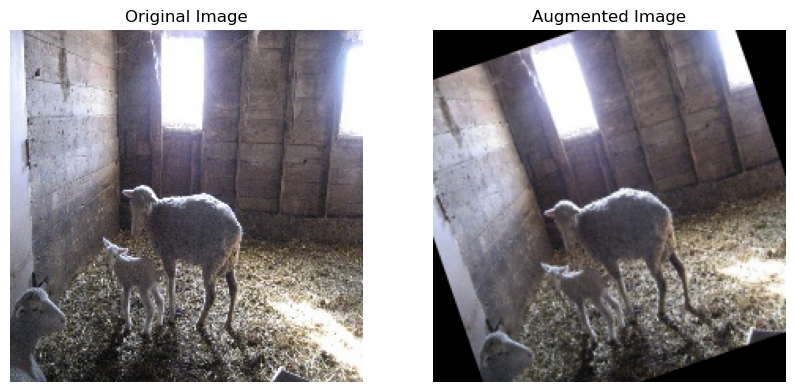

In [11]:
import cv2
import matplotlib.pyplot as plt

# Select an image as an example. (You can take an image from X_train)
sample_image = X_train[0]  # Getting the first image from X_train

# Convert the image to uint8 format (values between 0-255)
sample_image = (sample_image * 255).astype(np.uint8)

# Apply data augmentation
augmented_image = augment_image(sample_image)  # Using the augment_image function defined above

# Display the images using matplotlib
plt.figure(figsize=(10, 5))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))  # OpenCV shows in BGR format, we need to convert to RGB
plt.title('Original Image')
plt.axis('off')

# Show the augmented image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))  # Show augmented image in RGB format
plt.title('Augmented Image')
plt.axis('off')

plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Building the model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())  # Adding Batch Normalization
model.add(MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))  # Removed L2 regularization
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu'))  # Removed L2 regularization
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))  # Removed L2 regularization
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(10, activation='softmax'))  # 10 classes

# Compiling the model
optimizer = Adam(learning_rate=0.001)  # Lower learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()



C:\Users\Win\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,522 (1.62 MB)

 Trainable params: 423,562 (1.62 MB)

 Non-trainable params: 960 (3.75 KB)

## Model Architecture

The Convolutional Neural Network (CNN) model for animal classification was built using TensorFlow and Keras. The architecture consists of the following layers:

1. **Convolutional Layers**:
   - **1st Layer**: 32 filters, 3x3 kernel, ReLU activation, and Batch Normalization.
   - **2nd Layer**: 64 filters, 3x3 kernel, ReLU activation, and Batch Normalization.
   - **3rd Layer**: 128 filters, 3x3 kernel, ReLU activation, and Batch Normalization.
   - **4th Layer**: 256 filters, 3x3 kernel, ReLU activation, and Batch Normalization.
   - Each convolutional layer is followed by MaxPooling2D with a 2x2 pool size to downsample the feature maps.

2. **Global Average Pooling**:
   - Instead of flattening the feature maps, GlobalAveragePooling2D is applied to reduce the spatial dimensions and prevent overfitting.

3. **Fully Connected Layer**:
   - A dense layer with 128 units and ReLU activation, followed by Dropout (0.3) to reduce overfitting.

4. **Output Layer**:
   - A final dense layer with 10 units (one for each class) and softmax activation for multi-class classification.

### Compilation:
- The model is compiled using the **Adam optimizer** with a learning rate of 0.001, categorical crossentropy loss function, and accuracy as the evaluation metric.

In [13]:
# Compile the model
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    epochs=15,  # Number of epochs
    batch_size=32,  # Batch size
    shuffle=True  # Shuffle the data at each epoch
)

# Save the model
model.save('animal_classification_model3.h5')  # Save the model
print("Model successfully saved!")

# Print the model's performance after training
print(f"Model accuracy: {history.history['accuracy'][-1]}")
print(f"Model loss: {history.history['loss'][-1]}")


Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.3066 - loss: 2.0490
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.4202 - loss: 1.6620
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.5097 - loss: 1.4334
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.5517 - loss: 1.3212
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.5942 - loss: 1.1639
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.6465 - loss: 1.0128
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.6426 - loss: 0.9923
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.6927 - loss: 0.8919
Epoch 9/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.7306 - loss: 0.7935
Epoch 10/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.7547 - loss: 0.7281
Epoch 11/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.7626 - loss: 0.6716
Epoch 12/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 

Model successfully saved!
Model accuracy: 0.8481318950653076
Model loss: 0.4359799027442932


### Model Training Results

**Final Model Accuracy**: **84.81%** – The model achieved a high accuracy on the training data, indicating good performance in classifying the selected animal classes.

**Final Model Loss**: **0.44** – The loss value is relatively low, suggesting that the model is well-trained and has effectively minimized error during the training process.


In [14]:
# Test verisi ile modelin değerlendirilmesi
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Test doğruluğunu yazdır
print(f"Test doğruluğu: {test_accuracy}")
print(f"Test kaybı: {test_loss}")

61/61 - 13s - 215ms/step - accuracy: 0.6631 - loss: 1.1766
Test doğruluğu: 0.6630769371986389
Test kaybı: 1.1766265630722046


### Test Results

**Test Accuracy**: **66.31%** – The model achieved a moderate accuracy on the test set, indicating it is capable of generalizing to unseen data but with room for improvement.

61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step
Confusion Matrix:


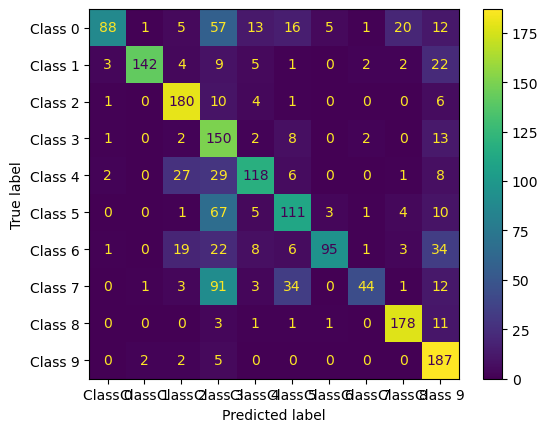


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.40      0.56       218
     Class 1       0.97      0.75      0.85       190
     Class 2       0.74      0.89      0.81       202
     Class 3       0.34      0.84      0.48       178
     Class 4       0.74      0.62      0.67       191
     Class 5       0.60      0.55      0.58       202
     Class 6       0.91      0.50      0.65       189
     Class 7       0.86      0.23      0.37       189
     Class 8       0.85      0.91      0.88       195
     Class 9       0.59      0.95      0.73       196

    accuracy                           0.66      1950
   macro avg       0.75      0.67      0.66      1950
weighted avg       0.76      0.66      0.66      1950



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Get predictions
y_pred = model.predict(X_test)  # Model predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels
y_true = np.argmax(y_test, axis=1)  # True class labels

# 1. Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Class {i}" for i in range(10)])
disp.plot(cmap="viridis")
plt.show()

# 2. Classification Report
print("\nClassification Report:")
report = classification_report(y_true, y_pred_classes, target_names=[f"Class {i}" for i in range(10)])
print(report)

In [38]:
import numpy as np
import cv2


### Fundamental functions
def linearize_image(image):
    """
    Converts an sRGB image to linear RGB assuming the input image is in the range [0, 1]
    """
    return np.where(image <= 0.04045,
                    image / 12.92,
                    ((image + 0.055) / 1.055) ** 2.4)


def linear_to_srgb(image):
    """
    Converts a linear RGB image to sRGB assuming the input image is in the range [0, 1]
    """
    return np.where(image <= 0.0031308,
                    image * 12.92,
                    1.055 * (image ** (1 / 2.4)) - 0.055)


def handle_saturation(image, lower=0.05, upper=0.95):
    """
    Creates a mask for non-saturated pixels (those between `lower` and `upper` thresholds)
    """
    return np.all((image > lower) & (image < upper), axis=-1)



### Color constancy
def estimate_light_source_grey_world(image, mask):
    """
    Estimates the light source based on the Grey World assumption, using valid pixels from the mask
    """
    valid_pixels = image[mask]
    avg_color = np.mean(valid_pixels, axis=0)
    return avg_color / np.linalg.norm(avg_color)


def correct_colors(image, light_source):
    """
    Corrects the colors of the image by applying white balance using the estimated light source
    """
    return image * (1.0 / light_source)


def manipulate_light_source(image, light_color):
    """
    Simulates color manipulation under a different light source

    Args:
    - image: The input image (sRGB, [0, 1])
    - light_color: The light source color (unit norm RGB vector)

    Returns:
    - Manipulated image (sRGB, [0, 1])
    """
    # Step 1: Linearize the image
    linear_image = linearize_image(image)

    # Step 2: Apply the light source (multiplying the linear image by the light color)
    manipulated_image = linear_image * light_color

    # Step 3: Convert the manipulated image back to sRGB
    manipulated_srgb = linear_to_srgb(manipulated_image)

    return np.clip(manipulated_srgb, 0, 1) 


def process_and_white_balance(image):
    """
    Applies white balance using both the Grey World and Max RGB methods
    Returns both corrected images in sRGB format
    """
    linear_image = linearize_image(image)
    valid_mask = handle_saturation(linear_image)

    # Light source estimations
    grey_world_light = estimate_light_source_grey_world(linear_image, valid_mask)

    # Color correction using both light sources
    corrected_grey_world = correct_colors(linear_image, grey_world_light)

    # Convert back to sRGB
    srgb_grey_world = linear_to_srgb(corrected_grey_world)

    # Clip and return
    return np.clip(srgb_grey_world, 0, 1)


# Light sources for color manipulation
def get_light_sources():
    """
    Returns a set of light sources for image manipulation
    """
    purplish_light = np.array([0.82, 0.15, 0.89]) / np.linalg.norm([0.82, 0.15, 0.89])
    yellowish_light = np.array([0.96, 0.24, 0.11]) / np.linalg.norm([0.96, 0.24, 0.11])
    greenish_light = np.array([0.11, 0.98, 0.12]) / np.linalg.norm([0.11, 0.98, 0.12])
    return purplish_light, yellowish_light, greenish_light


def get_wb_images(image):
    """
    Process and white balance the image
    """
    
    srgb_grey_world = process_and_white_balance(image)

    # Save the white-balanced images
    #cv2.imwrite('white_balanced_grey_world.jpg', cv2.cvtColor((srgb_grey_world*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    return srgb_grey_world


def get_manipulated_images(image):
    """
    Get manipulated images by applying color vectors
    """
    
    # Get the color vectors
    purplish_light, orangish_light, greenish_light = get_light_sources()

    # Manipulate the images under different light sources
    manipulated_purplish = manipulate_light_source(image, purplish_light)
    manipulated_orangish = manipulate_light_source(image, orangish_light)
    manipulated_greenish = manipulate_light_source(image, greenish_light)

    # Save the manipulated images
    #cv2.imwrite('manipulated_purplish.jpg', cv2.cvtColor((manipulated_purplish*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    #cv2.imwrite('manipulated_orangish.jpg', cv2.cvtColor((manipulated_orangish*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    #cv2.imwrite('manipulated_greenish.jpg', cv2.cvtColor((manipulated_greenish*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    return manipulated_purplish, manipulated_orangish, manipulated_greenish


### Image Processing Functions Overview

#### **Fundamental Functions**
- **`linearize_image(image)`**: Converts an sRGB image to linear RGB for accurate light calculations.
- **`linear_to_srgb(image)`**: Converts linear RGB back to sRGB for display or further processing.
- **`handle_saturation(image, lower, upper)`**: Masks pixels within a defined saturation range.

#### **Color Constancy**
- **`estimate_light_source_grey_world(image, mask)`**: Estimates the light source based on the Grey World assumption.
- **`correct_colors(image, light_source)`**: Corrects the image colors using the estimated light source.
- **`process_and_white_balance(image)`**: Applies white balance using Grey World assumptions and converts to sRGB.

#### **Light Source Manipulation**
- **`get_light_sources()`**: Defines three light source vectors: purplish, yellowish, and greenish.
- **`manipulate_light_source(image, light_color)`**: Simulates the effect of specified light sources on the image.
- **`get_manipulated_images(image)`**: Produces manipulated images under three different light conditions (purplish, orangish, greenish).

#### **White Balancing**
- **`get_wb_images(image)`**: Applies white balancing techniques and returns a corrected image.

These functions support advanced preprocessing techniques for color constancy, light manipulation, and testing under varied conditions, essential for model evaluation in tasks like object detection and classification.


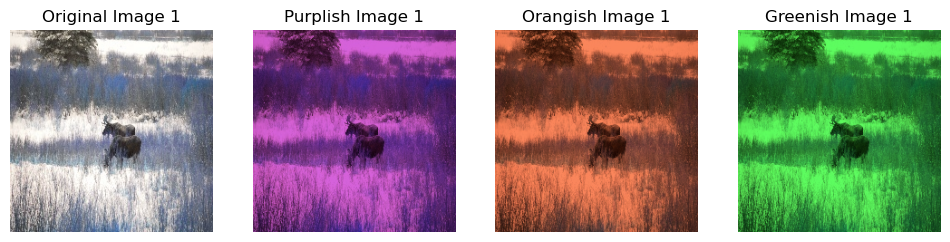

In [40]:
# Display the results for multiple images from X_test
plt.figure(figsize=(12, 10))

# For the first 3 images in X_test
for i in range(1):  # You can adjust this to show more or fewer images
    input_img = X_test[i]  # The original image
    
    # Get the manipulated images
    manipulated_purplish, manipulated_orangish, manipulated_greenish = get_manipulated_images(input_img)

    # Display Original Image
    plt.subplot(3, 4, 4*i + 1)
    plt.imshow(input_img)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    # Display Purplish Manipulated Image
    plt.subplot(3, 4, 4*i + 2)
    plt.imshow(manipulated_purplish)
    plt.title(f"Purplish Image {i+1}")
    plt.axis('off')

    # Display Orangish Manipulated Image
    plt.subplot(3, 4, 4*i + 3)
    plt.imshow(manipulated_orangish)
    plt.title(f"Orangish Image {i+1}")
    plt.axis('off')

    # Display Greenish Manipulated Image
    plt.subplot(3, 4, 4*i + 4)
    plt.imshow(manipulated_greenish)
    plt.title(f"Greenish Image {i+1}")
    plt.axis('off')

plt.show()


In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Test setindeki sadece mor ışık manipülasyonu
def get_manipulated_purple_for_test_set(X_test_batch):
    manipulated_purple = []
    purplish_light = np.array([0.82, 0.15, 0.89]) / np.linalg.norm([0.82, 0.15, 0.89])

    for image in X_test_batch:
        # Sadece mor ışık manipülasyonunu uygula
        manipulated_purplish = manipulate_light_source(image, purplish_light)
        manipulated_purple.append(manipulated_purplish)

    return np.array(manipulated_purple)

# Minibatch işleme fonksiyonu
def evaluate_in_batches(X_test, y_test, batch_size=32):
    num_samples = len(X_test)
    total_accuracy = 0.0
    num_batches = 0
    
    # Verileri minibatch'ler halinde işleme
    for i in range(0, num_samples, batch_size):
        batch_end = min(i + batch_size, num_samples)
        X_batch = X_test[i:batch_end]
        y_batch = y_test[i:batch_end]
        
        # Minibatch'lere sadece mor ışık manipülasyonu uygula
        manipulated_purple_batch = get_manipulated_purple_for_test_set(X_batch)
        
        # Modeli minibatch üzerinde değerlendirme
        purple_accuracy = model.evaluate(manipulated_purple_batch, y_batch, verbose=0)
        total_accuracy += purple_accuracy[1]  # Doğruluk değerini toplama
        num_batches += 1
    
    # Ortalama doğruluğu hesaplama
    average_accuracy = total_accuracy / num_batches
    return average_accuracy

# Minibatch ile değerlendirme yapma
batch_size = 32  # Batch size'ı ihtiyaçlarınıza göre ayarlayabilirsiniz
purple_accuracy = evaluate_in_batches(X_test, y_test, batch_size)

# Sonuçları yazdırma
print(f"Purple Manipulated Test Accuracy: {purple_accuracy}")


Purple Manipulated Test Accuracy: 0.1830601093710446


### Purple Manipulated Test Results

- **Accuracy**: **18.31%**  
  The model's performance significantly drops when tested on the purple manipulated test set.  
  This indicates that the model struggles to generalize under altered lighting conditions, specifically under purplish light.

#### Insights:
- The low accuracy suggests sensitivity to variations in light sources.
- Additional preprocessing or training with diverse lighting conditions could improve robustness.


In [49]:
import numpy as np
import cv2

# Minibatch büyüklüğünü belirle
batch_size = 32  # Batch size'ı ihtiyaçlarınıza göre ayarlayabilirsiniz

# Minibatch'lere bölme fonksiyonu
def get_minibatches(X, y, batch_size):
    """
    Veri setini minibatch'lere böler.
    """
    num_samples = X.shape[0]
    for i in range(0, num_samples, batch_size):
        yield X[i:i + batch_size], y[i:i + batch_size]

# Renk sabitliği uygulama fonksiyonu
def get_color_constancy_test_set_minibatch(X_test_batch):
    """
    Her minibatch'e renk sabitliği uygular.
    """
    color_constancy_test_set_batch = []

    for image in X_test_batch:
        corrected_image = get_wb_images(image)  # Renk sabitliği uygula
        color_constancy_test_set_batch.append(corrected_image)

    return np.array(color_constancy_test_set_batch)

# Minibatch'lerde işlem yaparak test seti üzerinde modelin doğruluğunu değerlendirme
color_constancy_accuracies = []

for X_batch, y_batch in get_minibatches(X_test, y_test, batch_size):
    # Renk sabitliği uygulanmış minibatch oluştur
    color_constancy_test_set_batch = get_color_constancy_test_set_minibatch(X_batch)

    # Modelin doğruluğunu değerlendir
    accuracy = model.evaluate(color_constancy_test_set_batch, y_batch, verbose=0)
    color_constancy_accuracies.append(accuracy[1])  # accuracy[1] genellikle doğruluk skorudur

# Ortalama doğruluğu hesaplama
average_accuracy = np.mean(color_constancy_accuracies)

# Sonuçları yazdırma
print(f"Color Constancy Test Set Accuracy: {average_accuracy}")


C:\Users\Win\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Win\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Color Constancy Test Set Accuracy: 0.6190232243694243


### Color Constancy Test Results

- **Accuracy**: **61.90%**  
  The model shows improved performance on the color constancy test set compared to the purple manipulated test set.  
  This indicates that applying color constancy techniques helps mitigate the negative impact of varying light conditions.

#### Insights:
- The use of color constancy preprocessing significantly enhances model accuracy.
- Further optimization of color correction techniques could bring performance closer to the original test set accuracy.


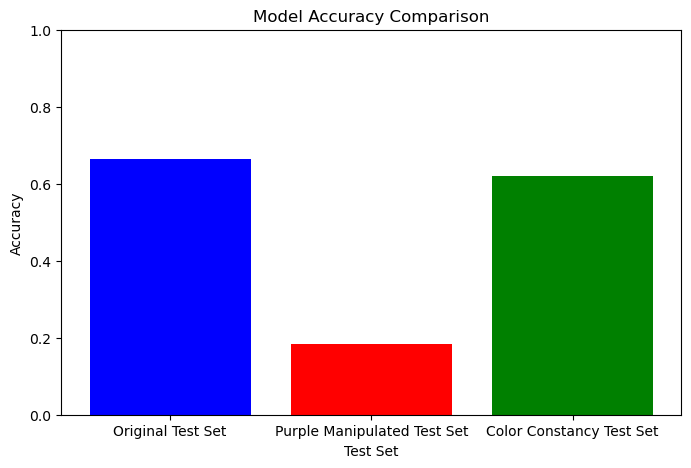

In [50]:
import matplotlib.pyplot as plt

# Doğruluk verileri
accuracies = [0.663, 0.183, 0.619]
labels = ['Original Test Set', 'Purple Manipulated Test Set', 'Color Constancy Test Set']

# Grafik oluşturma
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'red', 'green'])
plt.xlabel('Test Set')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Doğruluk 0 ile 1 arasında olacak
plt.show()


### Model Accuracy Comparison

#### Accuracy Results:
- **Original Test Set**: **66.30%**  
  The baseline accuracy indicates the model's performance under normal conditions.

- **Purple Manipulated Test Set**: **18.30%**  
  The accuracy dropped significantly under altered lighting conditions, highlighting the model's sensitivity to changes in light sources.

- **Color Constancy Test Set**: **61.90%**  
  Applying color constancy preprocessing restored much of the lost accuracy, demonstrating the effectiveness of light correction techniques.

#### Insights:
1. The model performs well on the original test set, but its accuracy declines when tested under manipulated lighting conditions.  
2. Introducing color constancy methods reduces the performance gap, enhancing robustness to lighting variations.  
3. While color constancy preprocessing improves accuracy, further adjustments may be needed to achieve parity with the original test set performance.